# Data Mining — Linear Regression — Mini-Project 1 (Energy Consumption)

**Course:** [CSEN911] Data Mining (Winter 2025)  
**Instructor:** Dr. Ayman Alserafi  
**Due:** 24 October 2025, 11:59 PM

**Dataset:** `energy_data.csv`  


> **Instructions:** For every step, write your own explanations and justifications and visualization in the provided Markdown prompts.




***Edit this cell with your name(s), tutorial number(s) and ID(s)***

---

Name: Valerie Antonious

ID: 59-30018

Tutorial: 2

---

Name:

ID:

Tutorial: 2

---


The dataset contains building-level energy readings and contextual attributes.

Each row represents a building observation. Columns include:

<div style="font-size:20px;">

| **Column** | **Description** |
|-------------|-----------------|
| **Building_ID** | Unique identifier for each building record. Used to distinguish one building entry from another. |
| **Building_Type** | Category describing the primary use of the building (e.g., Residential, Commercial, Industrial, Educational, etc.). |
| **Governorate** | The administrative region (governorate) where the building is located (e.g., Cairo, Giza, Alexandria). |
| **Neighborhood** | The smaller district or local area within the governorate where the building is located. |
| **Day_of_Week** | The day on which the energy consumption measurement was recorded (e.g., Sunday, Monday, etc.). |
| **Occupancy_Level** | The relative number of occupants or activity level in the building, typically categorized as *Low*, *Medium*, or *High*. |
| **Appliances_Usage_Level** | Indicates how intensively appliances are used in the building *Low*, *Medium*, or *High*. |
| **SquareFootage** | The total floor area of the building (numeric). Serves as a proxy for building size, often influencing energy usage. |
| **Last_Maintenance_Date** | The date of the last maintainance done on the building. |
| **Average_Temperature** | The average ambient temperature (in °C) recorded during the data period. |
| **Energy_Consumption** | The total energy used by the building, typically measured in kilowatt-hours (kWh).|

</div>


## Importing Libraries & Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

try:
    df = pd.read_csv('energy_data.csv')
except:
    df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2025/refs/heads/main/data/energy_data.csv')

df.head()

,Building_ID,Building_Type,Governorate,Neighborhood,Day_of_Week,Occupancy_Level,Appliances_Usage_Level,SquareFootage,Last_Maintenance_Date,Average_Temperature,Energy_Consumption
0,BLD-1000-UD,Residential,Alexandria,Smouha,WeDnesday,High,Low,7063m2,2020-01-01,28.61,2713.95 kWh
1,BLD-1001-AX,Commercial,Giza,+Mohandessin14,tuesDAY,High,High,44372m2,2022-02-24,NaN,5744.99 kWh
2,BLD-1002-IH,Industrial,Cairo,New Cairo,SunDay,Medium,Low,19255,2021-02-22,37.88,4101.24 kWh
3,BLD-1003-HE,NaN,NaN,+92Dokki,TuesDay,Low,High,13265,2023-07-30,35.06,3009.14 kWh
4,BLD-1004-XD,Commercial,Alexandria,Smouha,Monday,Low,Low,13375,2022-08-12,28.82,3279.17 kWh


## Data Inspection

Perform data inspection tasks here (recommended for data understanding).

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Building_ID             1100 non-null   object 
 1   Building_Type           990 non-null    object 
 2   Governorate             873 non-null    object 
 3   Neighborhood            1100 non-null   object 
 4   Day_of_Week             1100 non-null   object 
 5   Occupancy_Level         1100 non-null   object 
 6   Appliances_Usage_Level  1100 non-null   object 
 7   SquareFootage           1100 non-null   object 
 8   Last_Maintenance_Date   1100 non-null   object 
 9   Average_Temperature     990 non-null    float64
 10  Energy_Consumption      1100 non-null   object 
dtypes: float64(1), object(10)
memory usage: 94.7+ KB


Here we did this to see the information of the data. We found that all the columns are of type string except Average tempreture which is a float. We also found out the number of rows which are 1100 and the number of columns are 11. We also found the number of nulls in each column.

In [4]:
df.describe(include='all')



,Building_ID,Building_Type,Governorate,Neighborhood,Day_of_Week,Occupancy_Level,Appliances_Usage_Level,SquareFootage,Last_Maintenance_Date,Average_Temperature,Energy_Consumption
count,1100,990,873,1100,1100,1100,1100,1100,1100,990.000000,1100
unique,1100,3,3,848,42,3,3,1095,727,NaN,1100
top,BLD-2099-GL,Residential,Alexandria,Smouha,Sunday,High,Low,49653m2,2024-12-31,NaN,4722.59 kWh
freq,1,349,310,45,54,368,381,2,89,NaN,1
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.499404,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.703806,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-4.910000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.422500,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.260000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.970000,NaN


Here we saw that there are more than 7 unique values for the days of the week. We also found the mean, min, max and so on of the average tempreture and -4.9 is most likely an outlier because it is way past the 25% percentile.

In [5]:
for col in ['Building_Type', 'Governorate', 'Day_of_Week',
            'Occupancy_Level', 'Appliances_Usage_Level']:
    print(f"{col}: {df[col].unique()}\n")

Building_Type: ['Residential' 'Commercial' 'Industrial' nan]

Governorate: ['Alexandria' 'Giza' 'Cairo' nan]

Day_of_Week: ['WeDnesday' 'tuesDAY' 'SunDay' 'TuesDay' 'Monday' 'saturDAY' 'MoNday'
 'FRIDAY' 'SUNDAY' 'friDAY' 'THURSDAY' 'Sunday' 'sunday' 'SuNday'
 'Saturday' 'THursday' 'MonDay' 'thursday' 'saturday' 'FriDay' 'WEDNESDAY'
 'SaturDay' 'Tuesday' 'Friday' 'FRIday' 'Thursday' 'MONDAY' 'SATURDAY'
 'SaTurday' 'wednesday' 'sunDAY' 'monDAY' 'monday' 'WednesDay' 'friday'
 'thursDAY' 'wednESDAY' 'Wednesday' 'ThursDay' 'TUESDAY' 'tuesday'
 'TuEsday']

Occupancy_Level: ['High' 'Medium' 'Low']

Appliances_Usage_Level: ['Low' 'High' 'Medium']



Here we saw the unique values in each column and we found that days of the week has multiple values that are equivilent.

## Data Pre-Processing & Cleaning

_Apply any data preprocessing and/or feature engineering below. Show/output the changes to the dataset._

In [6]:
df['Building_Type'] = df['Building_Type'].fillna(df['Building_Type'].mode()[0])
df['Governorate'] = df['Governorate'].fillna(df['Governorate'].mode()[0])
df['Average_Temperature'] = df['Average_Temperature'].fillna(df['Average_Temperature'].mean())


df

,Building_ID,Building_Type,Governorate,Neighborhood,Day_of_Week,Occupancy_Level,Appliances_Usage_Level,SquareFootage,Last_Maintenance_Date,Average_Temperature,Energy_Consumption
0,BLD-1000-UD,Residential,Alexandria,Smouha,WeDnesday,High,Low,7063m2,2020-01-01,28.610000,2713.95 kWh
1,BLD-1001-AX,Commercial,Giza,+Mohandessin14,tuesDAY,High,High,44372m2,2022-02-24,33.499404,5744.99 kWh
2,BLD-1002-IH,Industrial,Cairo,New Cairo,SunDay,Medium,Low,19255,2021-02-22,37.880000,4101.24 kWh
3,BLD-1003-HE,Residential,Alexandria,+92Dokki,TuesDay,Low,High,13265,2023-07-30,35.060000,3009.14 kWh
4,BLD-1004-XD,Commercial,Alexandria,Smouha,Monday,Low,Low,13375,2022-08-12,28.820000,3279.17 kWh
...,...,...,...,...,...,...,...,...,...,...,...
1095,BLD-2095-OH,Commercial,Giza,(Dokki50,Saturday,High,Low,1161m2,2022-04-21,27.850000,3010.81 kWh
1096,BLD-2096-RH,Residential,Alexandria,Dokki-71,Sunday,Medium,Medium,37943m2,2024-10-31,36.230000,4248.49 kWh
1097,BLD-2097-JZ,Commercial,Giza,_Mohandessin91,SunDay,Low,Medium,1558,2021-04-18,20.000000,2843.6 kWh
1098,BLD-2098-ZP,Industrial,Alexandria,*23Smouha,saturday,Medium,Low,2145,2023-09-14,34.430000,3348.39 kWh


Here we replaced the nulls in the columns of the building type and governorate with the mode because they are catagorical. we replaced the nulls in the average tempreture with the mean because it is a numerical value.

In [7]:
df['Day_of_Week'] = df['Day_of_Week'].str.capitalize()
df

,Building_ID,Building_Type,Governorate,Neighborhood,Day_of_Week,Occupancy_Level,Appliances_Usage_Level,SquareFootage,Last_Maintenance_Date,Average_Temperature,Energy_Consumption
0,BLD-1000-UD,Residential,Alexandria,Smouha,Wednesday,High,Low,7063m2,2020-01-01,28.610000,2713.95 kWh
1,BLD-1001-AX,Commercial,Giza,+Mohandessin14,Tuesday,High,High,44372m2,2022-02-24,33.499404,5744.99 kWh
2,BLD-1002-IH,Industrial,Cairo,New Cairo,Sunday,Medium,Low,19255,2021-02-22,37.880000,4101.24 kWh
3,BLD-1003-HE,Residential,Alexandria,+92Dokki,Tuesday,Low,High,13265,2023-07-30,35.060000,3009.14 kWh
4,BLD-1004-XD,Commercial,Alexandria,Smouha,Monday,Low,Low,13375,2022-08-12,28.820000,3279.17 kWh
...,...,...,...,...,...,...,...,...,...,...,...
1095,BLD-2095-OH,Commercial,Giza,(Dokki50,Saturday,High,Low,1161m2,2022-04-21,27.850000,3010.81 kWh
1096,BLD-2096-RH,Residential,Alexandria,Dokki-71,Sunday,Medium,Medium,37943m2,2024-10-31,36.230000,4248.49 kWh
1097,BLD-2097-JZ,Commercial,Giza,_Mohandessin91,Sunday,Low,Medium,1558,2021-04-18,20.000000,2843.6 kWh
1098,BLD-2098-ZP,Industrial,Alexandria,*23Smouha,Saturday,Medium,Low,2145,2023-09-14,34.430000,3348.39 kWh


Here we fixed the capitalization issue in the column of the days of the week

In [8]:
df['Neighborhood'] = df['Neighborhood'].str.extract('([a-zA-Z\\s]+)', expand=False).str.strip()
df

,Building_ID,Building_Type,Governorate,Neighborhood,Day_of_Week,Occupancy_Level,Appliances_Usage_Level,SquareFootage,Last_Maintenance_Date,Average_Temperature,Energy_Consumption
0,BLD-1000-UD,Residential,Alexandria,Smouha,Wednesday,High,Low,7063m2,2020-01-01,28.610000,2713.95 kWh
1,BLD-1001-AX,Commercial,Giza,Mohandessin,Tuesday,High,High,44372m2,2022-02-24,33.499404,5744.99 kWh
2,BLD-1002-IH,Industrial,Cairo,New Cairo,Sunday,Medium,Low,19255,2021-02-22,37.880000,4101.24 kWh
3,BLD-1003-HE,Residential,Alexandria,Dokki,Tuesday,Low,High,13265,2023-07-30,35.060000,3009.14 kWh
4,BLD-1004-XD,Commercial,Alexandria,Smouha,Monday,Low,Low,13375,2022-08-12,28.820000,3279.17 kWh
...,...,...,...,...,...,...,...,...,...,...,...
1095,BLD-2095-OH,Commercial,Giza,Dokki,Saturday,High,Low,1161m2,2022-04-21,27.850000,3010.81 kWh
1096,BLD-2096-RH,Residential,Alexandria,Dokki,Sunday,Medium,Medium,37943m2,2024-10-31,36.230000,4248.49 kWh
1097,BLD-2097-JZ,Commercial,Giza,Mohandessin,Sunday,Low,Medium,1558,2021-04-18,20.000000,2843.6 kWh
1098,BLD-2098-ZP,Industrial,Alexandria,Smouha,Saturday,Medium,Low,2145,2023-09-14,34.430000,3348.39 kWh


Here we removed the extra characters in the neighborhood column

In [9]:
df['SquareFootage'] = df['SquareFootage'].astype(str).str.replace('m2', '', regex=False).astype(float)
df['Energy_Consumption'] = df['Energy_Consumption'].astype(str).str.replace('kWh', '', regex=False).astype(float)
df

,Building_ID,Building_Type,Governorate,Neighborhood,Day_of_Week,Occupancy_Level,Appliances_Usage_Level,SquareFootage,Last_Maintenance_Date,Average_Temperature,Energy_Consumption
0,BLD-1000-UD,Residential,Alexandria,Smouha,Wednesday,High,Low,7063.0,2020-01-01,28.610000,2713.95
1,BLD-1001-AX,Commercial,Giza,Mohandessin,Tuesday,High,High,44372.0,2022-02-24,33.499404,5744.99
2,BLD-1002-IH,Industrial,Cairo,New Cairo,Sunday,Medium,Low,19255.0,2021-02-22,37.880000,4101.24
3,BLD-1003-HE,Residential,Alexandria,Dokki,Tuesday,Low,High,13265.0,2023-07-30,35.060000,3009.14
4,BLD-1004-XD,Commercial,Alexandria,Smouha,Monday,Low,Low,13375.0,2022-08-12,28.820000,3279.17
...,...,...,...,...,...,...,...,...,...,...,...
1095,BLD-2095-OH,Commercial,Giza,Dokki,Saturday,High,Low,1161.0,2022-04-21,27.850000,3010.81
1096,BLD-2096-RH,Residential,Alexandria,Dokki,Sunday,Medium,Medium,37943.0,2024-10-31,36.230000,4248.49
1097,BLD-2097-JZ,Commercial,Giza,Mohandessin,Sunday,Low,Medium,1558.0,2021-04-18,20.000000,2843.60
1098,BLD-2098-ZP,Industrial,Alexandria,Smouha,Saturday,Medium,Low,2145.0,2023-09-14,34.430000,3348.39


Here we removed the kwh in the energy consumption to make the column float and we did the same by removing the m2 in the column of square footage

## Exploratory Data Analysis

**Q1:** What are the most popular neighborhoods? plot all and order them on the graph (mention top 3)

**Visualization**

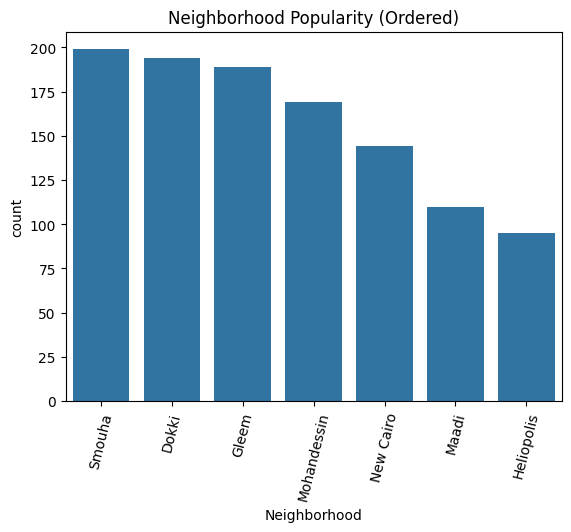

In [10]:
sns.countplot(x='Neighborhood', data=df, order=df['Neighborhood'].value_counts().index)
plt.title('Neighborhood Popularity (Ordered)')
plt.xticks(rotation=76)
plt.show()


**Answer for Q1:** the most popular neighborhoods are smouha, dokki, and gleem

**Q2:** Show the distribution of the energy consumption of each Building type.

Which type have the widest distribution of energy consumption?

Which (on average) has the highest consumption?.

**Visualization**

<Axes: xlabel='Building_Type', ylabel='Energy_Consumption'>

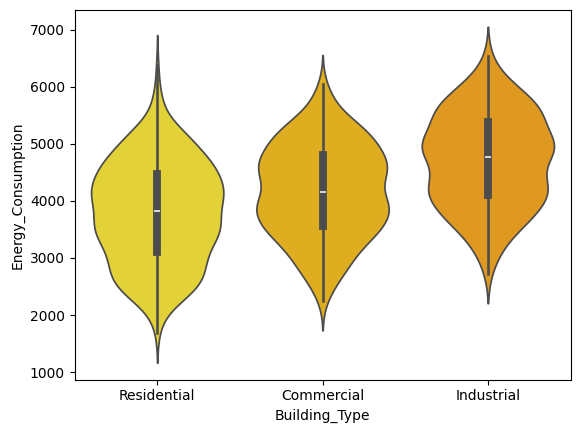

In [11]:
sns.violinplot(x='Building_Type', y='Energy_Consumption', data=df, palette='Wistia', hue='Building_Type', legend=False)


**Answer for Q2: The building type that has the widest distribution of energy consumption is the residential. On average the one that has the highest consumption is the industrial.

**Q3:** How does the building size affect energy consumption?

**Visualization**

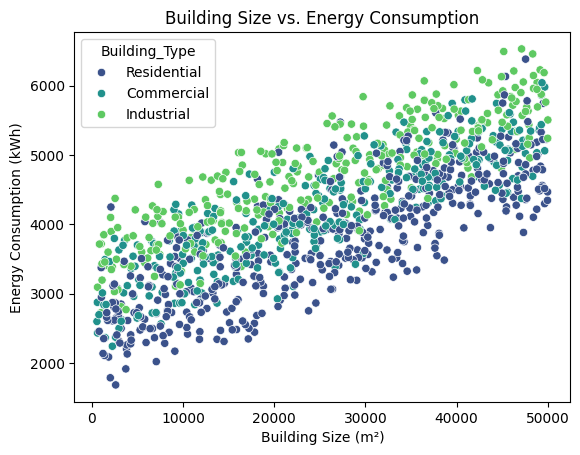

In [12]:
sns.scatterplot(x='SquareFootage', y='Energy_Consumption', hue='Building_Type', data=df, palette='viridis')
plt.title('Building Size vs. Energy Consumption')
plt.xlabel('Building Size (m²)')
plt.ylabel('Energy Consumption (kWh)')
plt.show()

**Answer for Q3:** There is a positive correlation between the building size and energy consumption. The industrial buildings have the highest energy consumption. The Commercial buildings show the widest spread. Residential buildings have lower  energy consumption

**Q4:** Do buildings consume more energy if not maintained frequently?

**Visualization**

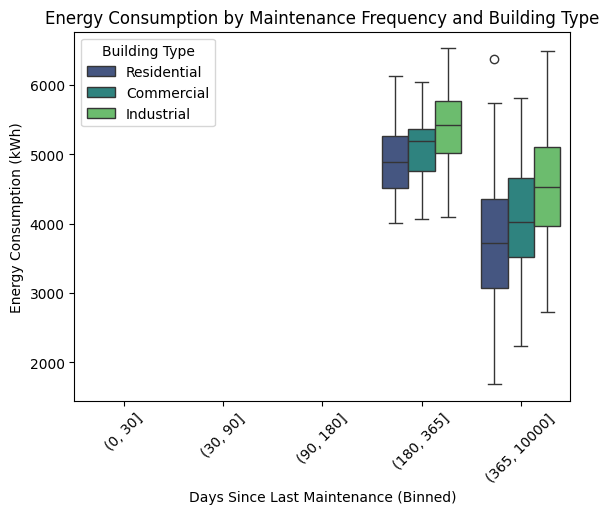

In [15]:
df['Last_Maintenance_Date'] = pd.to_datetime(df['Last_Maintenance_Date'])
df['Days_Since_Maintenance'] = (pd.Timestamp.today() - df['Last_Maintenance_Date']).dt.days
df['Maintenance_Bin'] = pd.cut(df['Days_Since_Maintenance'], bins=[0, 30, 90, 180, 365, 10000])
sns.boxplot(data=df, x='Maintenance_Bin', y='Energy_Consumption', hue='Building_Type', palette='viridis')
plt.title('Energy Consumption by Maintenance Frequency and Building Type')
plt.xlabel('Days Since Last Maintenance (Binned)')
plt.ylabel('Energy Consumption (kWh)')
plt.xticks(rotation=45)
plt.legend(title='Building Type')
plt.show()


**Answer for Q4: Buildings that go longer without maintenance usually show higher energy consumption industrial buildings show the highest energy usage across all maintenance intervals commercial buildings show the biggest spread in energy consumption also their usage increases noticeably with longer maintenance gaps residential buildings show lower and more consistent energy use but they also experience a little increase in consumption when maintenance is delayed.


**Q5:** Are all the numerical variables normally distributed, or is there any skewness?

**Visualization**

**Answer for Q5:** _Your answer here_

**Q6:** What is multicollinearity? And why is it a problem for linear regression? Does this problem exist in this
dataset?

**Visualization**

**Answer for Q6:** _Your answer here_

## Data Preparation for Modelling

_Apply any additional data preparation steps needed before modelling below. Show/output the changes to the dataset._

## Modelling

_Apply the linear regression model below._

## Model Evaluation

Evaluate the model you applied.

## Conclusion and Recommendations

Comment on the model performance and your findings from model evaluation. State the problems (if any) and suggest possible solutions. Would you recommend this model for an electrcity company aiming to estimate the energy levels of each building?

**Answer**: your answer here.